In [18]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

sys.path.append(os.path.join(os.path.dirname(""), os.pardir))
import coherence_analysis.utils as f

In [ ]:
# generate 2d array of i.i.d. samples from a normal distribution
def generate_samples(n, m, mean=0, std=1):
    """
    Generate a 2D array of i.i.d. samples from a normal distribution.

    Parameters:
    n (int): Number of rows.
    m (int): Number of columns.
    mean (float): Mean of the normal distribution.
    std (float): Standard deviation of the normal distribution.

    Returns:
    np.ndarray: 2D array of samples.
    """
    return np.random.normal(mean, std, size=(n, m))

In [63]:
win_len = 2
overlap = 0
samples_per_sec = 1000

nsensors = 200

data = generate_samples(nsensors, 70000, mean=0, std=0.005)

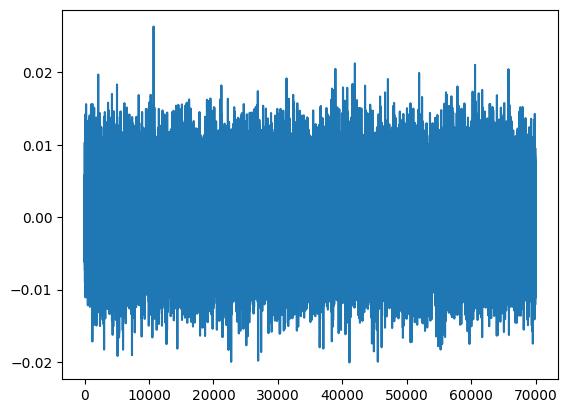

In [64]:
plt.plot(data[0, :])

In [65]:
norm_win_spectra, frequencies = f.normalised_windowed_spectra(
    data, win_len, overlap, sample_interval=1 / samples_per_sec
)

In [66]:
num_frames = norm_win_spectra.shape[0]
eig_ratios_coherence = np.empty(num_frames)
eig_ratios_coherence_qr = np.empty(num_frames)

for d in range(1,num_frames):
    # U, S, Vh = np.linalg.svd(win_spectra_noise[d])
    S = np.linalg.svd(
            norm_win_spectra[d],
            compute_uv=False,
            hermitian=False,
        )
    svd_approx2 = S**2
    # svd_approx2 = np.sort(S)[::-1]**2
    eig_ratios_coherence[d] = np.max(svd_approx2) / np.sum(svd_approx2)

    Q, R = np.linalg.qr(norm_win_spectra[d])
    # RRH = R @ (np.matrix(R).H)
    # diag is of sqrt(RR^*)
    # qr_approx2 = np.power(np.diag(RRH), 1)
    qr_approx2 = np.sum(np.multiply(R, np.conjugate(R)).real, axis=1)
    eig_ratios_coherence_qr[d] = np.max(qr_approx2) / np.sum(qr_approx2)

Text(0, 0.5, 'QR')

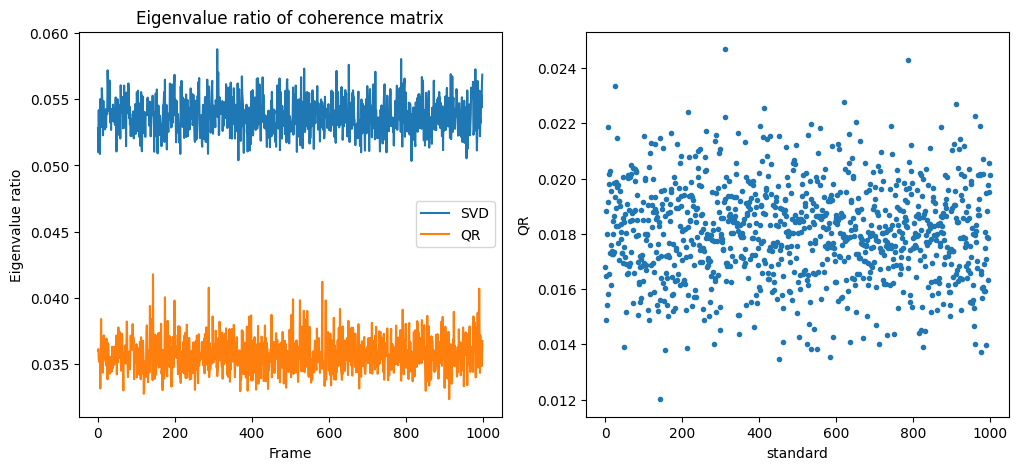

In [67]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(
    eig_ratios_coherence[1:],
    label="SVD",
)
plt.plot(
    eig_ratios_coherence_qr[1:],
    label="QR",
)
plt.xlabel("Frame")
plt.ylabel("Eigenvalue ratio")
plt.title("Eigenvalue ratio of coherence matrix")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(eig_ratios_coherence[1:] - eig_ratios_coherence_qr[1:], ".")
plt.xlabel("standard")
plt.ylabel("QR")

In [68]:
# threshold_u = 0.3
# threshold_d = 0.1

# max_norms_events, other_norms_events, max_norms_noise, other_norms_noise = get_norm_parameters(
#     eig_ratios_coherence, norm_win_spectra, threshold_u, threshold_d, qr=False
# )
# ratios_events = np.array(max_norms_events) / np.array(other_norms_events)
# ratios_noise = np.array(max_norms_noise) / np.array(other_norms_noise)

# plt.figure(figsize=(16, 5))
# plt.subplot(1, 3, 1)
# plt.plot(max_norms_events, other_norms_events, "o--", label="events")
# plt.plot(max_norms_noise, other_norms_noise, "o--", label="noise", alpha=0.5)
# plt.title("Events")
# plt.xlabel("Max norm")
# plt.ylabel("Other norms")
# plt.legend()
# plt.subplot(1, 3, 2)
# plt.plot(max_norms_noise, other_norms_noise, "o--")
# plt.title("Noise")
# plt.xlabel("Max norm")
# plt.ylabel("Other norms")
# plt.subplot(1, 3, 3)

In [69]:
basepath = Path("D:\CSM\Mines_Research\Test_data\Brady Hotspring")
files = ["PoroTomo_iDAS16043_160314083818.h5", "PoroTomo_iDAS16043_160314083848.h5", "PoroTomo_iDAS16043_160314083918.h5"]
file = basepath / files[1]

start_channel = 3100
end_channel = 5100

real_data, _ = f.load_brady_hdf5(file, normalize="no")
real_data = real_data[start_channel : end_channel : int((end_channel - start_channel) / nsensors)]

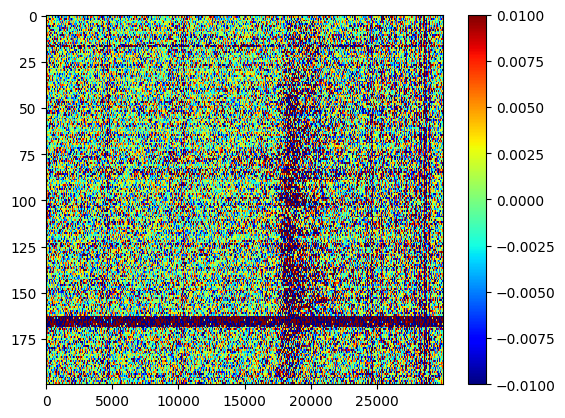

In [70]:
plt.imshow(
    real_data,
    aspect="auto",
    interpolation="none",
    cmap="jet",
    vmin=-0.01,
    vmax=0.01,
    # extent=[0, 70000, 0, nsensors],
)
plt.colorbar()

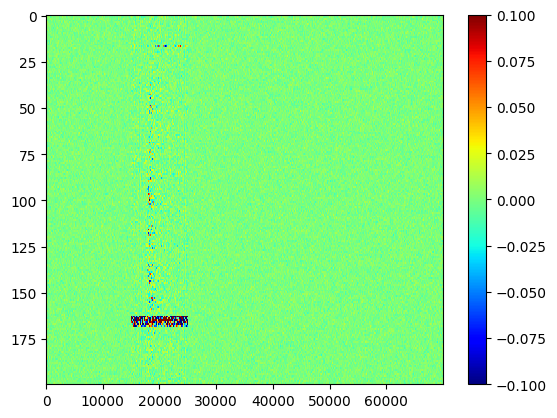

In [71]:
data[:, 15000:25000] = data[:, 15000:25000] + real_data[:, 15000:25000]

plt.imshow(
    data,
    aspect="auto",
    interpolation="none",
    cmap="jet",
    vmin=-0.1,
    vmax=0.1,
    # extent=[0, 70000, 0, nsensors],
)
plt.colorbar()

In [73]:
norm_win_spectra, frequencies = f.normalised_windowed_spectra(
    data, win_len, overlap, sample_interval=1 / samples_per_sec
)

In [74]:
num_frames = norm_win_spectra.shape[0]
eig_ratios_coherence = np.empty(num_frames)
eig_ratios_coherence_qr = np.empty(num_frames)

for d in range(1,num_frames):
    # U, S, Vh = np.linalg.svd(win_spectra_noise[d])
    S = np.linalg.svd(
            norm_win_spectra[d],
            compute_uv=False,
            hermitian=False,
        )
    svd_approx2 = S**2
    # svd_approx2 = np.sort(S)[::-1]**2
    eig_ratios_coherence[d] = np.max(svd_approx2) / np.sum(svd_approx2)

    Q, R = np.linalg.qr(norm_win_spectra[d])
    # RRH = R @ (np.matrix(R).H)
    # diag is of sqrt(RR^*)
    # qr_approx2 = np.power(np.diag(RRH), 1)
    qr_approx2 = np.sum(np.multiply(R, np.conjugate(R)).real, axis=1)
    eig_ratios_coherence_qr[d] = np.max(qr_approx2) / np.sum(qr_approx2)

Text(0, 0.5, 'QR')

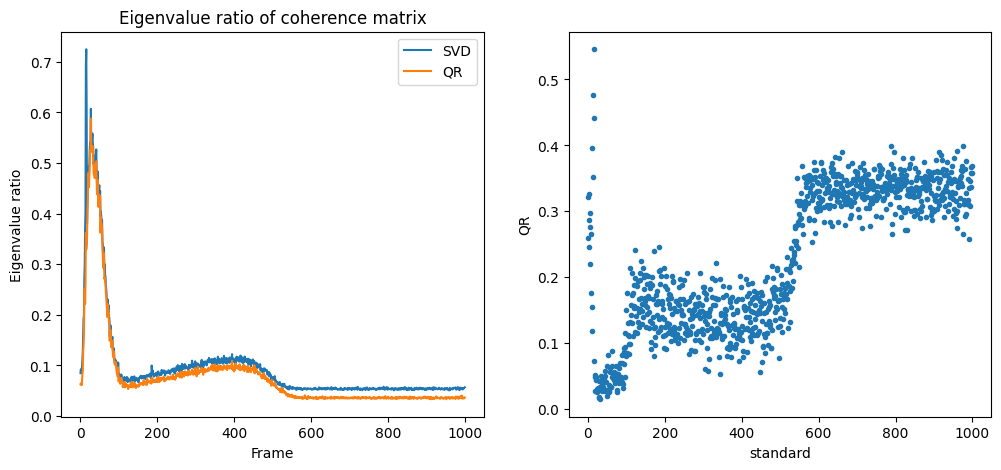

In [77]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(
    eig_ratios_coherence[1:],
    label="SVD",
)
plt.plot(
    eig_ratios_coherence_qr[1:],
    label="QR",
)
plt.xlabel("Frame")
plt.ylabel("Eigenvalue ratio")
plt.title("Eigenvalue ratio of coherence matrix")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot((eig_ratios_coherence[1:] - eig_ratios_coherence_qr[1:])/eig_ratios_coherence[1:], ".")
plt.xlabel("standard")
plt.ylabel("QR")